![Rhyme](https://rhyme.com/assets/img/logo-dark.png)

# Task 1: Introduction

Welcome to Basic Image Classification with TensorFlow.

This graph describes the problem that we are trying to solve visually. We want to create and train a model that takes an image of a hand written digit as input and predicts the class of that digit, that is, it predicts the digit or it predicts the class of the input image.

![Hand Written Digits Classification](images/1_1.png)

### Import TensorFlow

In [2]:
import tensorflow as tf

tf.logging.set_verbosity(tf.logging.ERROR)
print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 1.13.1


# Task 2: The Dataset
### Import MNIST

In [3]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Shapes of Imported Arrays

In [4]:
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


### Plot an Image Example

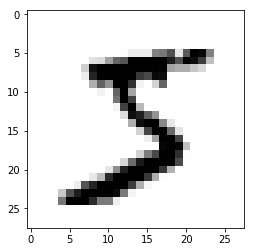

In [9]:
from matplotlib import pyplot as plt
%matplotlib inline
# to ensure the images are displayed within the notebook

plt.imshow(x_train[0], cmap='binary')
plt.show()

### Display Labels

In [11]:
y_train[0]

5

In [12]:
print(len(set(y_train)))

10


# Task 3: One Hot Encoding
After this encoding, every label will be converted to a list with 10 elements and the element at index to the corresponding class will be set to 1, rest will be set to 0:

| original label | one-hot encoded label |
|------|------|
| 5 | [0, 0, 0, 0, 0, 1, 0, 0, 0, 0] |
| 7 | [0, 0, 0, 0, 0, 0, 0, 1, 0, 0] |
| 1 | [0, 1, 0, 0, 0, 0, 0, 0, 0, 0] |

### Encoding Labels

In [13]:
from tensorflow.keras.utils import to_categorical


y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

### Validated Shapes

In [15]:
print('y_train_encoded shape:', y_train_encoded.shape)
print('y_test_encoded shape:', y_test_encoded.shape)

y_train_encoded shape: (60000, 10)
y_test_encoded shape: (10000, 10)


### Display Encoded Labels

In [16]:
y_train_encoded[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Task 4: Neural Networks

### Linear Equations

![Single Neuron](images/1_2.png)

The above graph simply represents the equation:

\begin{equation}
y = w1 * x1 + w2 * x2 + w3 * x3 + b
\end{equation}

Where the `w1, w2, w3` are called the weights and `b` is an intercept term called bias. The equation can also be *vectorised* like this:

\begin{equation}
y = W . X + b
\end{equation}

Where `X = [x1, x2, x3]` and `W = [w1, w2, w3].T`. The .T means *transpose*. This is because we want the dot product to give us the result we want i.e. `w1 * x1 + w2 * x2 + w3 * x3`. This gives us the vectorised version of our linear equation.

A simple, linear approach to solving hand-written image classification problem - could it work?

![Single Neuron with 784 features](images/1_3.png)

### Neural Networks

![Neural Network with 2 hidden layers](images/1_4.png)

This model is much more likely to solve the problem as it can learn more complex function mapping for the inputs and outputs in our dataset.

# Task 5: Preprocessing the Examples

### Unrolling N-dimensional Arrays to Vectors

In [17]:
import numpy as np

x_train_reshaped = np.reshape(x_train, (60000,784))
x_test_reshaped = np.reshape(x_test, (10000,784))

print('x_train_reshaped shape:', x_train_reshaped.shape)
print('x_test_reshaped shape:', x_test_reshaped.shape)

x_train_reshaped shape: (60000, 784)
x_test_reshaped shape: (10000, 784)


### Display Pixel Values

In [18]:
print(set(x_train_reshaped[0]))    # see all the unique pixel values of an example

{0, 1, 2, 3, 9, 11, 14, 16, 18, 23, 24, 25, 26, 27, 30, 35, 36, 39, 43, 45, 46, 49, 55, 56, 64, 66, 70, 78, 80, 81, 82, 90, 93, 94, 107, 108, 114, 119, 126, 127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166, 170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205, 207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244, 247, 249, 250, 251, 252, 253, 255}


### Data Normalization

In [33]:
x_mean = np.mean(x_train_reshaped)
x_std = np.std(x_train_reshaped)

epsilon = 1e-10

# normalize the values (adding epsilon because std may be too small sometimes)
x_train_norm = (x_train_reshaped - x_mean) / (x_std + epsilon)
x_test_norm = (x_test_reshaped - x_mean) / (x_std + epsilon)


### Display Normalized Pixel Values

In [20]:
print(x_train_norm[0]) # normalized values

[-0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0

# Task 6: Creating a Model
### Creating the Model

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# two hidden layers
# one output layer

model = Sequential([
    Dense(128, activation='relu', input_shape=(784, )),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax'),
])


### Activation Functions

The first step in the node is the linear sum of the inputs:
\begin{equation}
Z = W . X + b
\end{equation}

**relu**: linear function for all positive values and 0 for all the negative **relu**: 

**softmax**:<br>


The second step in the node is the activation function output:

\begin{equation}
A = f(Z)
\end{equation}

Graphical representation of a node where the two operations are performed:

![ReLU](images/1_5.png)

### Compiling the Model

In [26]:
model.compile(
    optimizer = 'sgd',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


# Task 7: Training the Model

### Training the Model

In [45]:
model.fit(x_train_norm, y_train_encoded, epochs=30)

Epoch 1/30
60000/60000 [==============================] - 6s 105us/sample - loss: nan - acc: 0.0987
Epoch 2/30
60000/60000 [==============================] - 10s 160us/sample - loss: nan - acc: 0.0987
Epoch 3/30
60000/60000 [==============================] - 6s 102us/sample - loss: nan - acc: 0.0987
Epoch 4/30
60000/60000 [==============================] - 6s 105us/sample - loss: nan - acc: 0.0987
Epoch 5/30
60000/60000 [==============================] - 6s 100us/sample - loss: nan - acc: 0.0987
Epoch 6/30
60000/60000 [==============================] - 6s 97us/sample - loss: nan - acc: 0.0987
Epoch 7/30
60000/60000 [==============================] - 6s 95us/sample - loss: nan - acc: 0.0987
Epoch 8/30
60000/60000 [==============================] - 6s 94us/sample - loss: nan - acc: 0.0987
Epoch 9/30
60000/60000 [==============================] - 6s 94us/sample - loss: nan - acc: 0.0987
Epoch 10/30
60000/60000 [==============================] - 5s 91us/sample - loss: nan - acc: 0.0987
Epo

### Evaluating the Model

In [34]:
loss, accuracy = model.evaluate(x_test_norm, y_test_encoded)
print('Test set Accuracy:', accuracy * 100)

10000/10000 [==============================] - 1s 57us/sample - loss: nan - acc: 0.0980
Test set Accuracy: 9.799999743700027


# Task 8: Predictions

### Predictions on Test Set

In [36]:
preds = model.predict(x_test_norm)
print(f'shape of preds: {preds.shape}')

shape of preds: (10000, 10)


### Plotting the Results

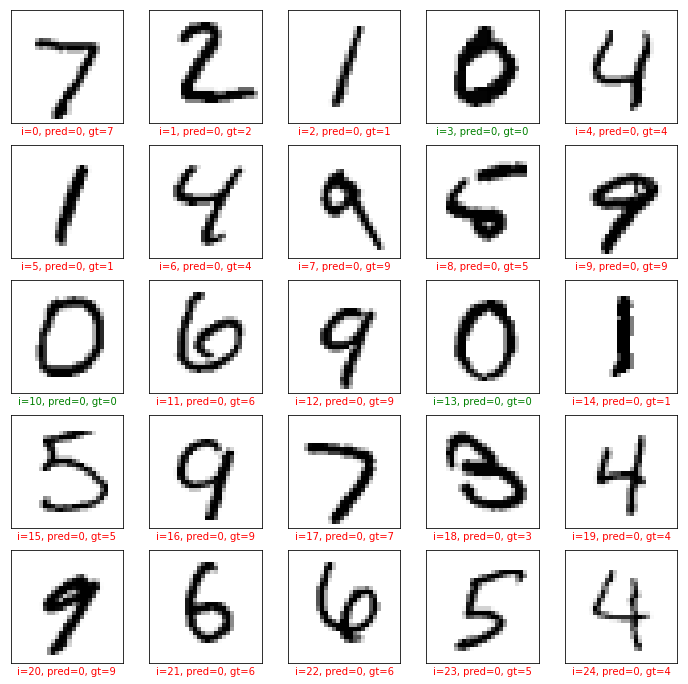

In [39]:
plt.figure(figsize=(12,12))

start_index = 0

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    pred = np.argmax(preds[start_index + i])
    gt=y_test[start_index + i]    # ground truth
    
    col='g'# colour
    if pred!=gt:
        col='r'
    plt.xlabel('i={}, pred={}, gt={}'.format(start_index+i, pred, gt), color=col)
    
    plt.imshow(x_test[start_index+i], cmap='binary')
plt.show()
    

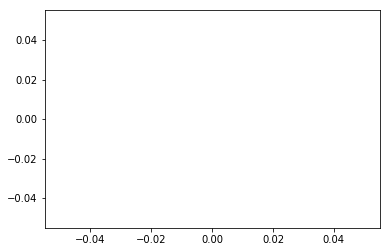

In [43]:
plt.plot(preds[7])
plt.show()